(500, 500)


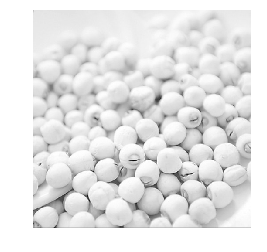

In [9]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib
import matplotlib.pyplot as plt
import cv2
from skimage.feature import peak_local_max
img = cv2.imread('seed.jpg')
imggray = cv2.imread('seed.jpg',0)
#imggray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#imggray = rgb2gray(img)

plt.imshow(imggray, cmap="gray")
print(imggray.shape)
plt.axis("off")

plt.show()

(500, 500)


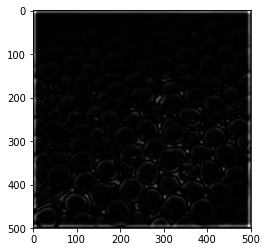

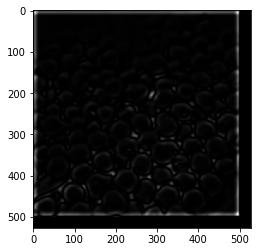

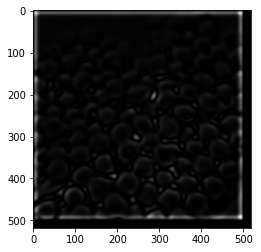

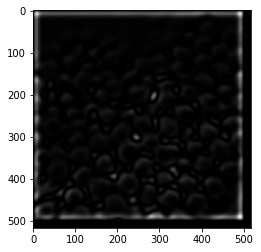

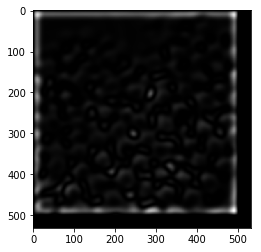

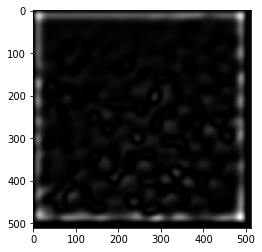

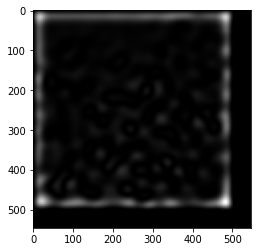

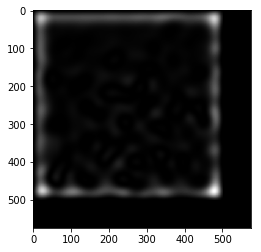

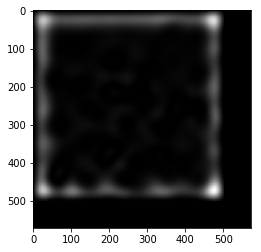

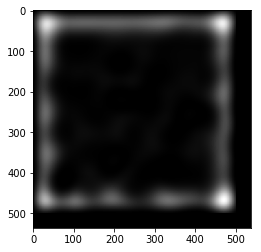

<Figure size 432x288 with 0 Axes>

In [10]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal as sig
import cv2

print(imggray.shape)
h,w = imggray.shape
def filter(sigma):
    s = sigma
    f = int(6*s)
    if(f%2!=0):
        F = np.zeros((f,f))
        for i in range(0,f):
            for j in range(0,f):
                x = i-(f//2)
                y = j-(f//2)
                F[i][j] = ((x**2)+(y**2)-2*(s**2))*math.exp(-((x**2)+(y**2))/(2*(s**2)))*(s**2)
    else:
        F = np.zeros((f+1,f+1))
        for i in range(0,f+1):
            for j in range(0,f+1):
                x = i-((f+1)//2)
                y = j-((f+1)//2)
                F[i][j] = ((x**2)+(y**2)-2*(s**2))*math.exp(-((x**2)+(y**2))/(2*(s**2)))*(s**2)
    return F

sigma = 4
response = []
for i in range(0,10):
    sigma = 4*(1.25**i)
    #print(sigma)
    f = int(6*sigma)
    ws = f
    if(f%2!=0):
        L = np.zeros((f,f))
        L = filter(sigma)
    else:
        L = np.zeros((f+1,f+1))
        L = filter(sigma)
    #plt.imshow(L,cmap="gray")
    #plt.figure()
    if(ws%2==0):
        ws+=1
    NI = sig.convolve2d(imggray, L, mode='same')
    NI2 = np.square(NI)
    #print(NI2.shape)
    color = [0, 0, 0]
    h,w = NI2.shape
    if(h%ws!=0):
        top = 0
        bottom = ws-(h%ws)
    else:
        top = 0
        bottom = 0
    if(w%ws!=0):
        right = ws-(w%ws)
        left = 0
    else:
        right = 0
        left = 0
    #print(ws,h%ws,w%ws)
    #print(top,bottom,right,left)
    NI3 = cv2.copyMakeBorder(NI2, top, bottom, left, right, cv2.BORDER_CONSTANT,value=color)
    plt.imshow(NI3,cmap="gray")
    #print(NI3.shape)
    response.append(NI3)
    plt.figure()

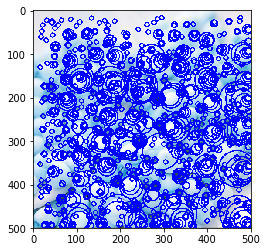

In [11]:
img_copy = img.copy()
sigma = 4
w_size = np.zeros(imggray.shape)
radius = []
for a in range(0,10):
    peakvalues = peak_local_max(response[a],min_distance = (a+1)*5)
    radius = int(sigma*(1.25**a)*math.sqrt(2))
    win_size = int(6*sigma*(1.25**a))
    if(win_size%2==0):
        win_size+=1
    for b in peakvalues:
        cv2.circle(img_copy,(b[1],b[0]),radius,(0, 0, 255),2)
        w_size[b[0],b[1]] = win_size
cv2.imwrite("HW_3_solns/seed_b4_blob.jpg",img_copy)
plt.imshow(img_copy)
plt.show()
        

In [12]:
h,w = imggray.shape
for a in range(0,h):
    for b in range(0,w):
        if(w_size[a, b]!=0):
            win_size_2 = int(w_size[a, b]/2)-int(w_size[a, b]/3)
            for c in range(a-win_size_2,a+win_size_2):
                for d in range(b-win_size_2,b+win_size_2):
                    if((c>=0 and c<h) and (d>=0 and d<w)):
                        if(w_size[c, d] < w_size[a, b]):
                            w_size[c, d] = 0
                

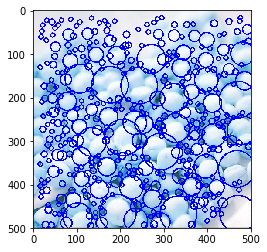

In [13]:
img_copy2 = img.copy()
for a in range(0,h):
    for b in range(0,w):
        if(w_size[a, b]!=0):
            cv2.circle(img_copy2,(b,a),int((w_size[a, b]*math.sqrt(2))/6),(0, 0, 255),2)

cv2.imwrite("HW_3_solns/seed_a4_blob.jpg",img_copy2)            
plt.imshow(img_copy2)
plt.show()